# Analysis of Gun Deaths in the United States (2012–2014)

This dataset includes information about gun-death in the US in the years 2012-2014.

The data includes data regarding the victim's age, sex, race, education, intent, 
time (month and year) and place of death, and whether or not police was at the place of death.

# Question to answers

 1: How many males and females are included in this study?
 
 2: How many educated females are included in this study?
 
 3: What is the number of suicide gun deaths by gender in the United States from 2012 to 2014, by gender?
 
 4: What is the number of gun deaths by race in the United States per 100,000 people from 2012 to 2014?
 
 5: What is the number of gun deaths in the United States on average from 2012 to 2014, by cause?
 
 6: What is the percentage per 100,000 people of annual gun deaths in the United States from 2012 to 2014, by cause?
 
 7: What is the percentage of suicide gun deaths in the United States from 2012 to 2014, by year?
 
 8: How would you classify death cause by gender?
 
 9: What is the age distribution of death by gun in the US between 2012-2014?
 
 10: Which 5 locations have the highest numbers of gun death in the US between 2012-2014, and what are the leading intents in those locations?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', color_codes=True)

%matplotlib inline

In [2]:
pip install sweetviz

In [4]:
dataset = pd.read_csv('guns.csv', index_col=0)
print(dataset.shape)
dataset.index.name = 'Index'
dataset.columns = map(str.capitalize, dataset.columns)
dataset.head(5)

(100798, 10)


,Year,Month,Intent,Police,Sex,Age,Race,Hispanic,Place,Education
Index,,,,,,,,,,
1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


In [5]:
import sweetviz as sv
sweet_report = sv.analyze(dataset)
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [99]:
dataset.describe()

,Year,Month,Police,Age,Hispanic,Education
count,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000,100745.000000
mean,2013.000357,6.567601,0.013909,43.857601,114.179607,2.296352
std,0.816278,3.405609,0.117114,19.496181,61.595734,0.990105
min,2012.000000,1.000000,0.000000,0.000000,100.000000,1.000000
25%,2012.000000,4.000000,0.000000,27.000000,100.000000,2.000000
50%,2013.000000,7.000000,0.000000,42.000000,100.000000,2.000000
75%,2014.000000,9.000000,0.000000,58.000000,100.000000,3.000000
max,2014.000000,12.000000,1.000000,107.000000,998.000000,5.000000


This data shows that at least a baby(<1) and a senior(>100) is involved in gun death in the US

Organize the data set by year and then by month.

In [5]:
df_Gun = dataset
df_Gun.sort_values(['Year', 'Month'], inplace=True)

# Finding mixing data

In [101]:
missing_values = df_Gun.isna().sum().sort_values(ascending = False) / len(df_Gun)
missing_values

Place        0.013730
Education    0.000526
Age          0.000179
Intent       0.000010
Year         0.000000
Month        0.000000
Police       0.000000
Sex          0.000000
Race         0.000000
Hispanic     0.000000
dtype: float64

The percentage of missing data in this dataset is too negligible for reasonable replacement. Therefore we can process with 
our analysis

## Question 1: How many males and females are included in this study?

In [6]:
df_Gun.Sex.value_counts(normalize=False)

M    86349
F    14449
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

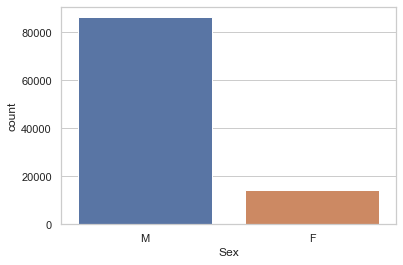

In [102]:
sns.set_style("whitegrid")
sns.countplot(x="Sex", data=df_Gun)

## Question 2: How many educated females are included in this study?

In [8]:
df_byGender = df_Gun.groupby('Sex').count()
df_byGender

,Year,Month,Intent,Police,Age,Race,Hispanic,Place,Education
Sex,,,,,,,,,
F,14449,14449,14449,14449,14446,14449,14449,14386,14430
M,86349,86349,86348,86349,86334,86349,86349,85028,86315


## Question 3: What is the number of suicide gun deaths by gender in the United States from 2012 to 2014, by gender?

<AxesSubplot:title={'center':'Annual U.S.\\suicide gun deaths \n 2012-2014, by gender'}>

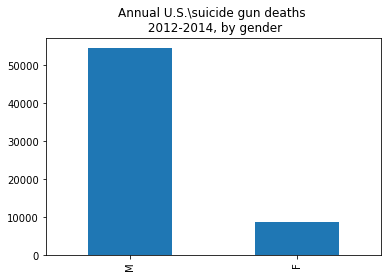

In [11]:
df_suicide_Gender =df_Gun[df_Gun["Intent"] =="Suicide"]
df_suicide_Gender.Sex.value_counts(normalize=False).plot.bar(title='Annual U.S.\\suicide gun deaths \n 2012-2014, by gender')

There are huge differences between males and females. The number of male suicides by gun is above 50,000, while the female death rate is below 10,000, which shows how males are more likely to commit suicide using a gun than females.

<AxesSubplot:title={'center':'Annual U.S. suicide gun deaths \n 2012-2014, by gender'}, xlabel='Sex'>

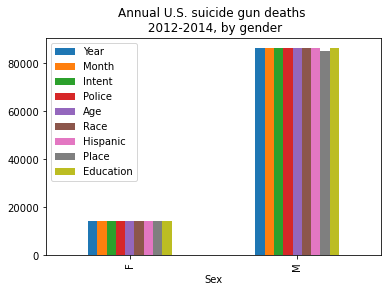

In [18]:
df_byGender = df_Gun.groupby('Sex').count()
df_byGender.plot.bar(title='Annual U.S. suicide gun deaths \n 2012-2014, by gender')

## Question 4: What is the number of gun deaths by race in the United States per 100,000 people from 2012 to 2014?

In [85]:
df_byRace = df_Gun
(df_byRace.Race.value_counts(ascending=False)*100/100000)

White                             66.237
Black                             23.296
Hispanic                           9.022
Asian/Pacific Islander             1.326
Native American/Native Alaskan     0.917
Name: Race, dtype: float64

<AxesSubplot:title={'center':'Percent death toll from guns in the United States \nfrom 2012 to 2014, by race'}>

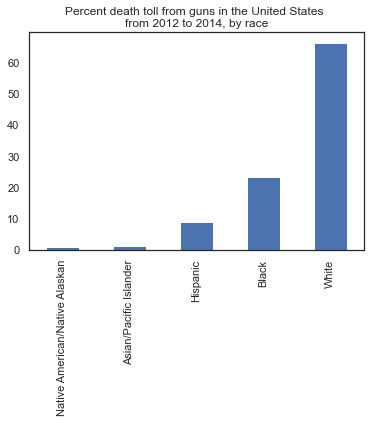

In [84]:
(df_byRace.Race.value_counts(ascending=True)*100/100000).plot.bar(title='Percent death toll from guns in the United States \nfrom 2012 to 2014, by race')

The highest death rate was for white people, then black, and then Hispanic. There are a few other races listed, but the rates are small comparatively.

## Question 5: What is the number of gun deaths in the United States on average from 2012 to 2014, by cause?

In [86]:
df_byRace.Intent.value_counts(sort =True, ascending=False)

Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Name: Intent, dtype: int64

<AxesSubplot:title={'center':'Annual number of gun deaths in the United States on average \n from 2012 to 2014, by cause'}>

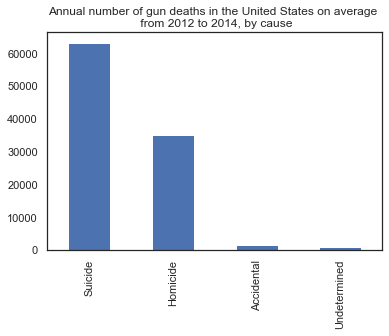

In [89]:
df_byRace.Intent.value_counts(sort=True).plot.bar(title='Annual number of gun deaths in the United States on average \n from 2012 to 2014, by cause')

## Question 6: What is the percentage per 100,000 people of annual gun deaths in the United States from 2012 to 2014, by cause?

In [90]:
df_byRace.Intent.value_counts(ascending=False)*100/100000

Suicide         63.175
Homicide        35.176
Accidental       1.639
Undetermined     0.807
Name: Intent, dtype: float64

<AxesSubplot:title={'center':'Rate gun deaths in the U.S. per 100,000 population \n2012-2014, by race'}>

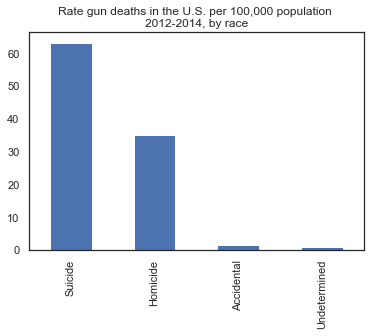

In [91]:
(df_byRace.Intent.value_counts(ascending=False)
*100/100000).plot.bar(title='Rate gun deaths in the U.S. per 100,000 population \n2012-2014, by race')

There are 60 suicide cases for every 100,000 people. In addition, there are 30 homicide cases for every 100,000.

## Question 7: What is the percentage of suicide gun deaths in the United States from 2012 to 2014, by year?

In [94]:
df_suicide=df_Gun[ df_Gun["Intent"]=="Suicide"]
df_GunSuicide= df_suicide.Year.value_counts(ascending=False) *100/100000
df_GunSuicide.sort_values(ascending=True)

2012    20.666
2013    21.175
2014    21.334
Name: Year, dtype: float64

<AxesSubplot:title={'center':'Percentage of annual suicide gun deaths in the United States \nfrom 2012 to 2014, by year'}>

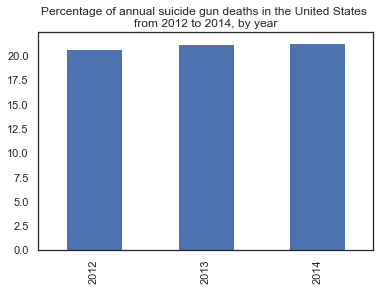

In [96]:
df_GunSuicide.sort_values(ascending=True).plot.bar(title='Percentage of annual suicide gun deaths in the United States \nfrom 2012 to 2014, by year')

Almost the same number of suicides each year over three years, which means that this is a regular pattern.

## Question 8: How would you classify death cause by gender?

<AxesSubplot:xlabel='Sex', ylabel='count'>

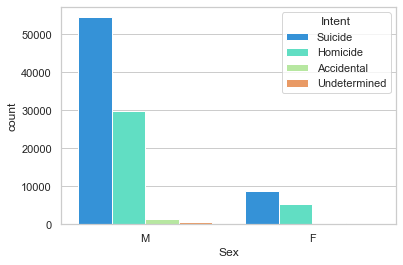

In [103]:
sns.set_style("whitegrid")
sns.countplot(x="Sex", hue="Intent", data=df_Gun, palette="rainbow")

The female have less than 10,000 suicide and homicide cases respectively, and less than 1,000 Accidental cases. This report
shows that males are 5times more likely to commit suicide by gun in the US than Females.

## Question 9: What is the age distribution of death by gun in the US between 2012-2014?

<AxesSubplot:>

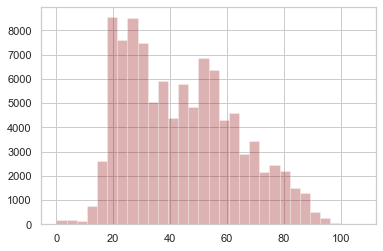

In [104]:
df_Gun["Age"].hist(bins=30, color="darkred", alpha=0.3)

The report shows that most deaths by gun in the US range from the teenage age(18) to the sixties(60s) 

## Question 10: Which 5 locations have the highest numbers of gun death in the US between 2012-2014, and what are the leading intents in those locations?

In [113]:
df_byPlace = df_Gun
(df_byPlace.Place.value_counts(ascending=False))

Home                       60486
Other specified            13751
Street                     11151
Other unspecified           8867
Trade/service area          3439
School/instiution            671
Farm                         470
Industrial/construction      248
Residential institution      203
Sports                       128
Name: Place, dtype: int64

<AxesSubplot:title={'center':'Rate gun deaths in the U.S. \n2012-2014, by Place of incidence'}>

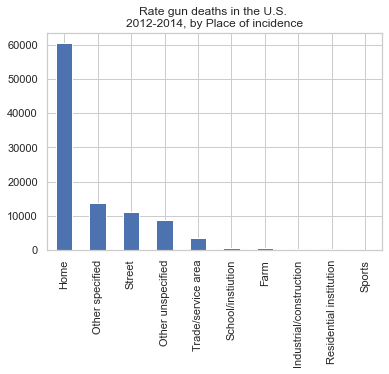

In [114]:
(df_byPlace.Place.value_counts(ascending=False)).plot.bar(title='Rate gun deaths in the U.S. \n2012-2014, by Place of incidence')

Home has the highest number of death by gun, followed by Other specified location, street and unspecified places.Trade 
and service area is 5th on the rank.

<AxesSubplot:xlabel='Intent', ylabel='count'>

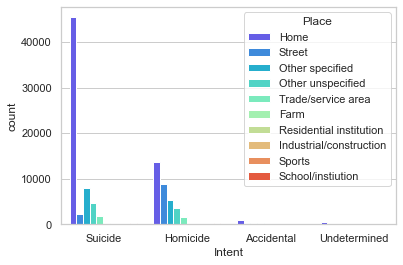

In [111]:
sns.set_style("whitegrid")
sns.countplot(x="Intent", hue="Place", data=df_Gun, palette="rainbow")

It is observed that most deaths by gun occurred at home (suicide was the leading intent) with over 40,000 cases followed by 
homicide with over 10,000 cases, then accident with over 1,000 cases. 
Street has a higher number of homicide cases than suicide. Street has close to 10,000 cases of homicide. 
Followed by other specified and unspecified locations.

<AxesSubplot:xlabel='Month', ylabel='count'>

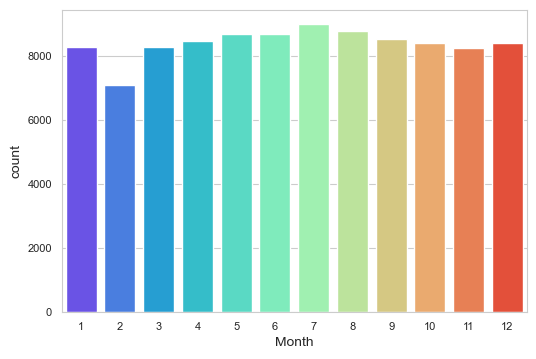

In [46]:
sns.set_style("whitegrid")
sns.countplot(x="Month", data=dataset, palette = "rainbow")

<AxesSubplot:xlabel='Race', ylabel='count'>

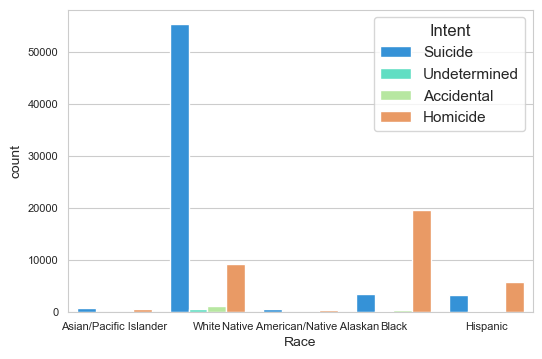

In [49]:
sns.set_style("whitegrid")
sns.countplot(x="Race", hue= "Intent", data=dataset, palette = "rainbow")

## Insights drawn

1. This data shows that at least a baby(<1) and a senior(>100) is involved in gun death in the US.

2. Male suicide gun deaths is more than 50,000, while females suicide gun deaths is below 10,000, which shows how males are more likely to commit suicide with a gun than female. It reveals that males in the US are 5times more likely to commit suicide by gun than the females.

3. The highest number of deaths is for white people(almost 3times more than the black), followed by black, and then Hispanic.

4. There is a high number of suicide and homicide deaths compared to a low number of deaths due to accidents. Suicide case is most common among the white, while homicide case is most common among the black.

5. There are 60 suicide cases for every 100,000 people, which is not a high rate. In addition, there are 30 homicide cases for every 100,000 people.

6. The analysis shows almost the same number of suicides each year over a period of three years, which means that this is like a regular pattern in US.

7. The report shows that most deaths by gun in the US range from the teenage age(18) to the sixties(60s). Suicide case is highest among people of age 20-21, followed by age 34.   

8. Home has the highest number of death by gun, followed by Other specified location, street and unspecified places.Trade and service area is 5th on the rank. This explains why most suicide cases occur at home, perhaps due to the privacy it provides. However, Street has the higher number of homicide cases than suicide. 

9. The data shows that gun deaths in the US is highest in the month of July, probably because of summer holiday. However the margin is not quite significant
